# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## This notebook was last tested with IPython notebook 4.1.0 using Python 2.7
### (If you have trouble running this notebook, please check version compatibility)

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from ipywidgets import interact, interact_manual, fixed
from api_ipython import SkaIPythonAPI as iapi
from api import SkaPythonAPI as api
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Mid)

available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)

# The High Priority Science Objective list below includes the HPSOs that were originally intended for 
# The Survey telescope. These have since been reassigned to Mid.
available_hpsos = [HPSOs.hpso_max_Low_c, HPSOs.hpso_max_Low_s, HPSOs.hpso_max_Mid_c, HPSOs.hpso_max_Mid_s, 
                   HPSOs.hpso_max_band5_Mid_c, HPSOs.hpso_max_band5_Mid_s, 
                   HPSOs.hpso01c, HPSOs.hpso01s, HPSOs.hpso02A, HPSOs.hpso02B, HPSOs.hpso14, HPSOs.hpso14c, HPSOs.hpso14s, 
                   HPSOs.hpso22, HPSOs.hpso37a, HPSOs.hpso37b, HPSOs.hpso38a, HPSOs.hpso38b, 
                   HPSOs.hpso13c, HPSOs.hpso13s, HPSOs.hpso15c, HPSOs.hpso15s, 
                   HPSOs.hpso27, HPSOs.hpso33, HPSOs.hpso37c]

available_hpsos.sort()

available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = available_modes + (ImagingModes.All,)
verbose_display = False

In [2]:
import time
t0 = time.time()
# Debugging
telescope = Telescopes.SKA1_Low
submode = ImagingModes.Continuum
band = Bands.Low
tp = imp.calc_tel_params(telescope, submode, band=band)
t1 = time.time()
(tsnap_opt, nfacet_opt) = imp.find_optimal_Tsnap_Nfacet(tp)
t2 = time.time()
tp_eval = iapi.evaluate_all_expressions(tp, tsnap_opt, nfacet_opt)
t3 = time.time()
#answ = iapi.evaluate_expression("datarate", tp, tsnap_opt, nfacet_opt, take_max=False)
#print answ
print (t1-t0, t2-t1, t3-t2)
print tp_eval

api.py:60: UserWarning: Subsitution substitution aborted with msg: can't convert expression to float
  warnings.warn("Subsitution substitution aborted with msg: %s" % str(e))
api.py:60: UserWarning: Subsitution substitution aborted with msg: maximum recursion depth exceeded while calling a Python object
  warnings.warn("Subsitution substitution aborted with msg: %s" % str(e))


computed df as 0.000
(0.2850000858306885, 10.172999858856201, 4.26800012588501)
Parameter Container Object with the following fields:
epsilon_f_approx		= 5.33333333333
Rccf_predict		= 261632.0*f_bin*(3.80207419191552*Max(5.7... (truncated)
Qfov		= 1.8
Rfft_final_cycle		= 8.91948040163e+13
Na		= 512
DeltaW_Earth		= 60.3175346196
Rfft_intermediate_cycles		= 2500.0*f_bin*(8831.01001034701*sign(N_fa... (truncated)
wl_sb_max		= 31.4968253739
Rccf_backward		= 3.36093006248e+13
Bmax		= 80000
wl_sb_min		= 23.8527519118
Nw		= 2
Rrp		= 50.0*(8831.01001034701*sign(N_facet - 1)... (truncated)
Tsnap_min		= 1.0
dfonF_predict		= 0.0275704536719
B_dump_ref		= 80000
Ngw_backward		= 172.158632095
combine_time_samples		= 40.0
Tcoal_predict		= 9.0
Theta_beam		= 0.000447239098347
Rccf		= 6.72186012496e+13
Npp		= 4
Tsnap		= 451.62859356
baseline_bin_distribution		= [ 52.42399198   7.91161595   5.91534571 ... (truncated)
Rgrid_backward		= 5.12020031712e+14
Rflop_conv		= 10465280.0*N_facet**2*f_bin*(6400.0 + 

api.py:60: UserWarning: Subsitution substitution aborted with msg: maximum recursion depth exceeded
  warnings.warn("Subsitution substitution aborted with msg: %s" % str(e))


MID is being limited to use only 75km max baseline in Fase Imaging mode!
Max baseline = 75000
Max baseline = 150000


Telescope,SKA1_Mid_rebaselined,SKA1_Mid_rebaselined,
Band,Mid1,Mid1,
Mode,Fast Imaging,Continuum,
Baseline Dependent Time Avg.,True,True,
Max Baseline,150000,150000,m
Max # channels,65536,65536,
Optimal Number of Facets,2,7,
Optimal Snapshot Time,1.0,80.6,sec.
Image side length,19253,36673,pixels
Visibility Buffer,0.000262,18.7,PetaBytes
Working (cache) memory,0.551,465,TeraBytes


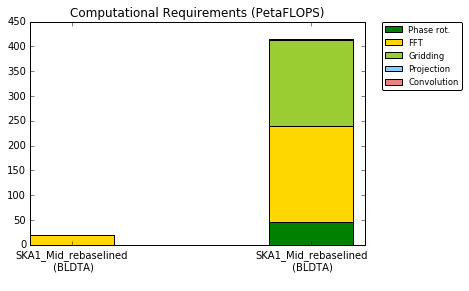

In [4]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## Using default values, can compute results for the High Priority Science Objectives

HPSO Number,22
Telescope,SKA1_Mid_rebaselined
Mode,Continuum
Max Baseline,150000 m
Max # of channels,65536
Observation time,6 hr 0 min 0 sec
Texp (not used in calc),6000 hr 0 min 0 sec
Tpoint (not used in calc),600 hr 0 min 0 sec


Inefficiency Warning: reassigning already-defined parameter "%s" with an identical value.


Optimal Number(s) of Facets,2
Optimal Snapshot Time(s),1501.2 sec.
Image side length(s),117037 pixels
Visibility Buffer,6.14 PetaBytes
Working (cache) memory,275 TeraBytes
I/O Rate,6.26 TeraBytes/s
Total Compute Requirement,6.77 PetaFLOPS
-> Gridding,2.34 PetaFLOPS
-> FFT,2.91 PetaFLOPS
-> Phase Rotation,0.00316 PetaFLOPS
-> Projection,0.832 PetaFLOPS


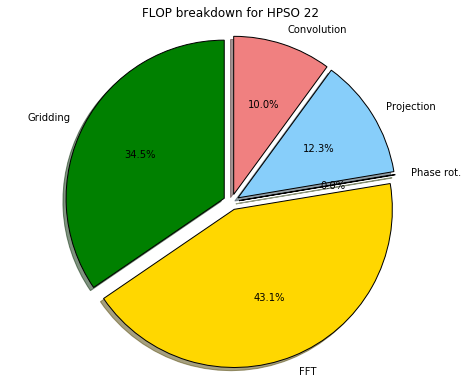

In [2]:
interact_manual(iapi.evaluate_hpso_optimized, hpso_key=available_hpsos, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Bmax, evaluating expression Rflop over range (50000, 150000) in 10 steps (i.e. 11 data points)
Image Characteristics:
----------------------

Facet FOV:  0.0235785100876882*(0.903239311623932*sign(N_facet - 1) + 4.51619655811966)/N_facet  rads
PSF size:   4.97761431429680e-6  rads
Pixel size: 1.65920477143227e-6  rads
No. pixels on facet side: 14210.7294371717*(0.903239311623932*sign(N_facet - 1) + 4.51619655811966)/N_facet
Epsilon approx : 0.342997170285018
Found Qbw =    4.286, and cell frac error, epsilon,     0.343
Max subband ratio 1.35
Subband Freq ratio used: 1.31607401295
Number subbands use in imaging 4.0
Maximum baseline 150000
Station (or antenna) diameter 13.5
Number of stations (or antennas) 197

---------------------

Channelization Characteristics:
-------------------------------

Ionospheric timescale (for updating kernels and limiting any time averaging):  10.0  sec
Coalesce Time predict:  Min(1.2, 0.14*Max(1.0, floor(180169.468625599/Bmax,b

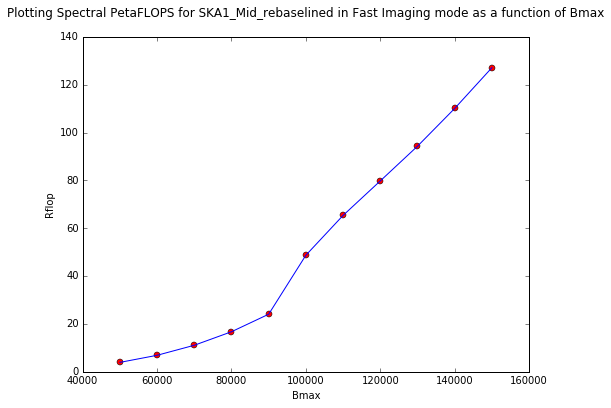

50000.0 , 3.93719704523
60000.0 , 6.90341674282
70000.0 , 11.0977503761
80000.0 , 16.751321805
90000.0 , 24.0801832207
100000.0 , 48.7483119939
110000.0 , 65.3942095194
120000.0 , 79.8206679033
130000.0 , 94.3347984105
140000.0 , 110.124805682
150000.0 , 127.159015803


In [3]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Bmax'
param_val_min =50000
param_val_max = 150000
number_steps = 10
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.FastImg
band=Bands.Mid1

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=True)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

In [ ]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
immode = ImagingModes.Continuum
expression = 'Rflop'
parameters = ('Nf_out', 'minimum_channels')
parameter_ranges = ((100,500),(100,500))
number_steps = 4
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))